In [2]:
import pkg_resources

import matplotlib
import matplotlib.pyplot as plt

import pandas as pd 

from tpoint.fitting import mc_tpoint, best_fit_pars
from tpoint.visualization import plot_corner, pointing_azel_resid, pointing_histogram, pointing_residuals
from tpoint.io import read_azel_datfile
from tpoint.transform import tpoint

In [3]:
datafile = pkg_resources.resource_filename("tpoint", os.path.join("test_data", "k_and_e.dat"))
coo_ref, coo_meas = read_azel_datfile(datafile)
idata = mc_tpoint(coo_ref, coo_meas)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [el_sigma, az_sigma, tx, tf, npae, ca, aw, an, ie, ia]


Sampling 4 chains for 2_000 tune and 2_000 draw iterations (8_000 + 8_000 draws total) took 54 seconds.


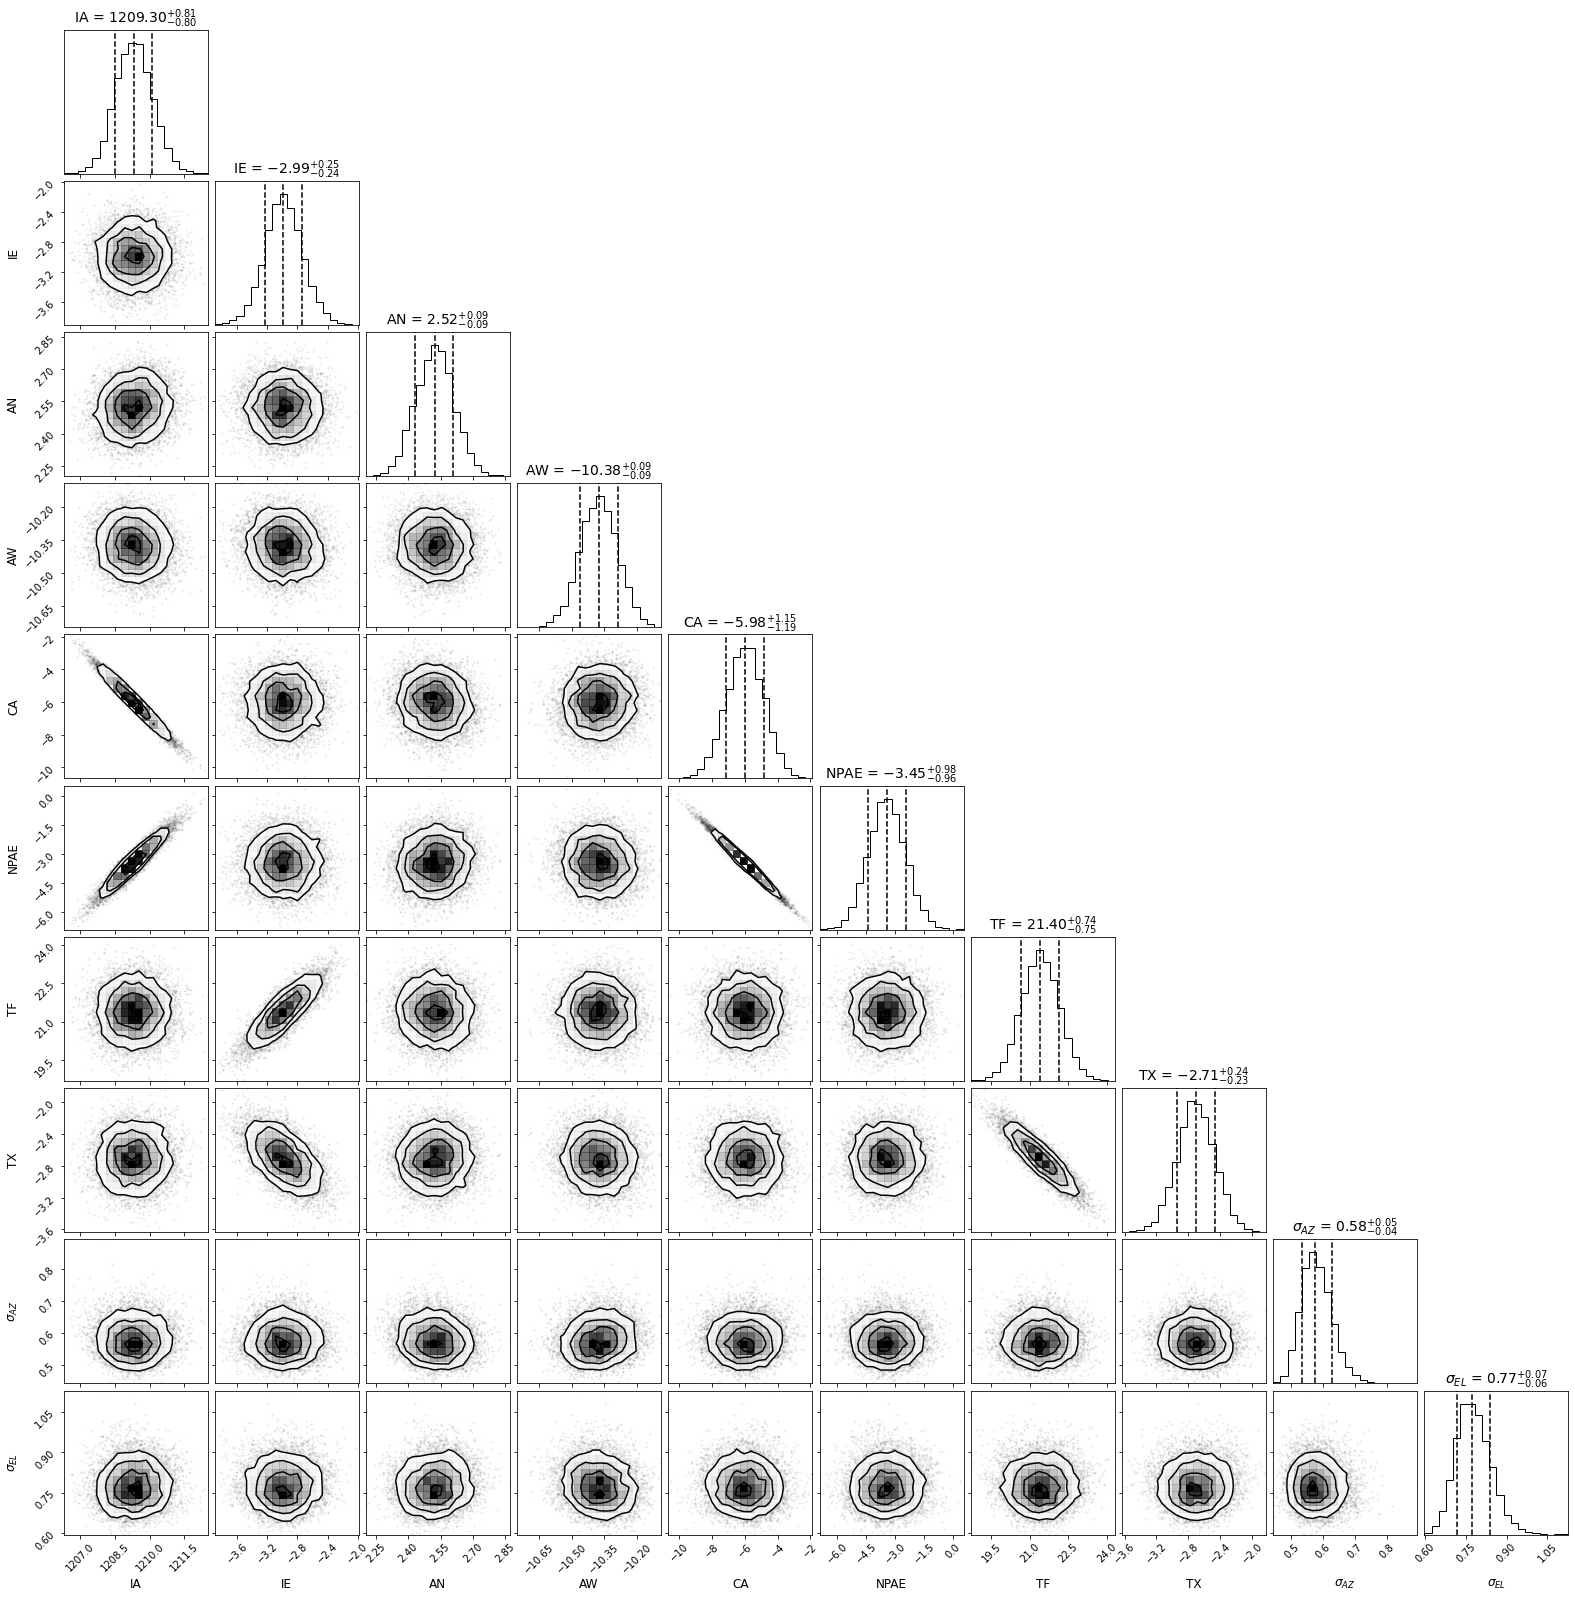

In [4]:
f = plot_corner(idata)

In [5]:
pars = best_fit_pars(idata)
pars

{'ia': 1209.30871677,
 'ie': -2.9843539,
 'an': 2.5222254,
 'aw': -10.37632057,
 'ca': -5.99712425,
 'npae': -3.43969063,
 'tf': 21.40765165,
 'tx': -2.70705054}

In [6]:
mc_coo = tpoint(coo_meas, **pars)

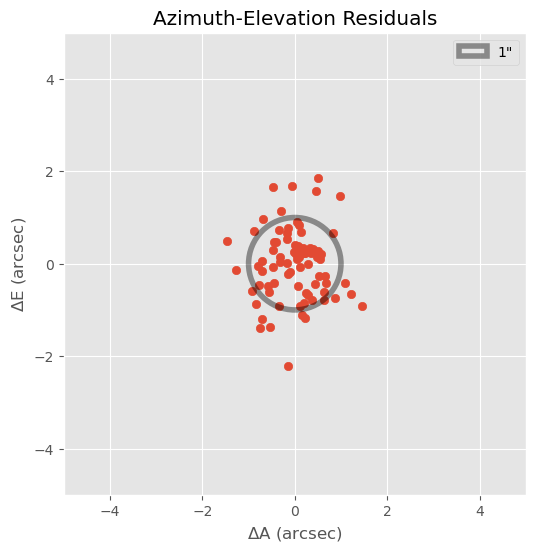

In [7]:
f = pointing_residuals(coo_ref, mc_coo)

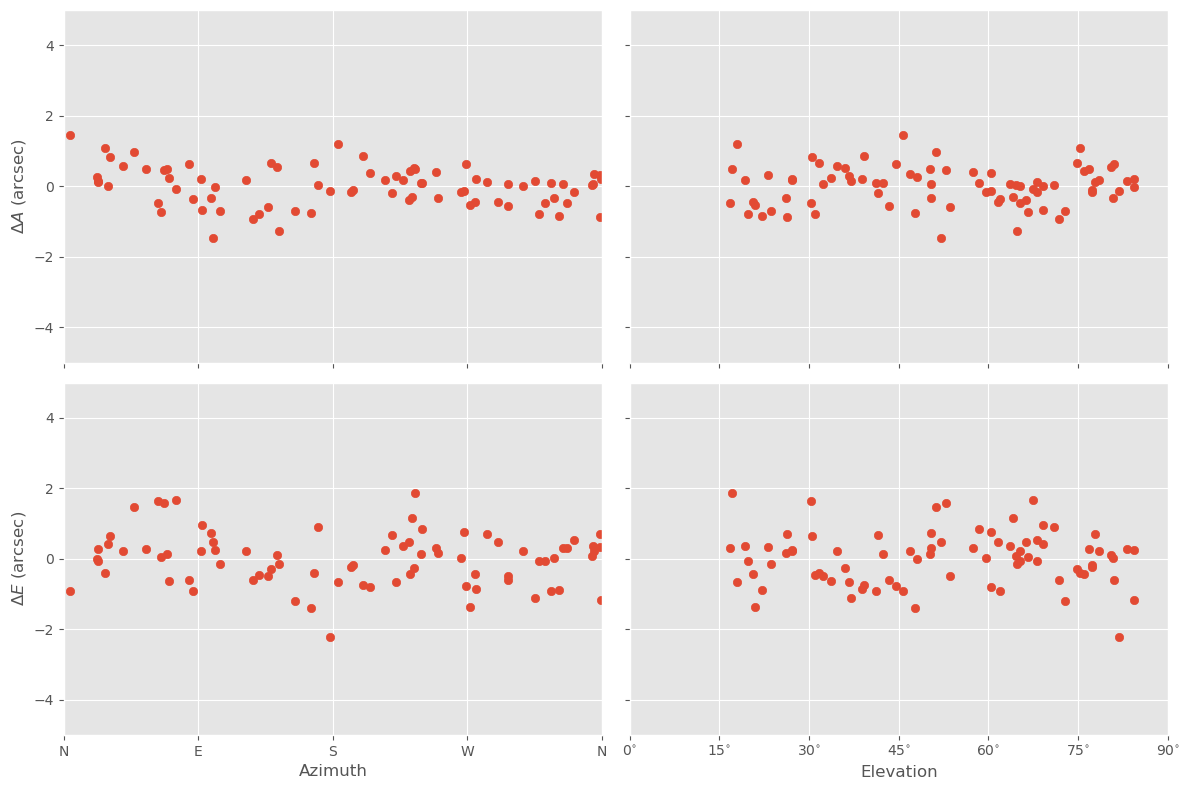

In [8]:
f = pointing_azel_resid(coo_ref, mc_coo)

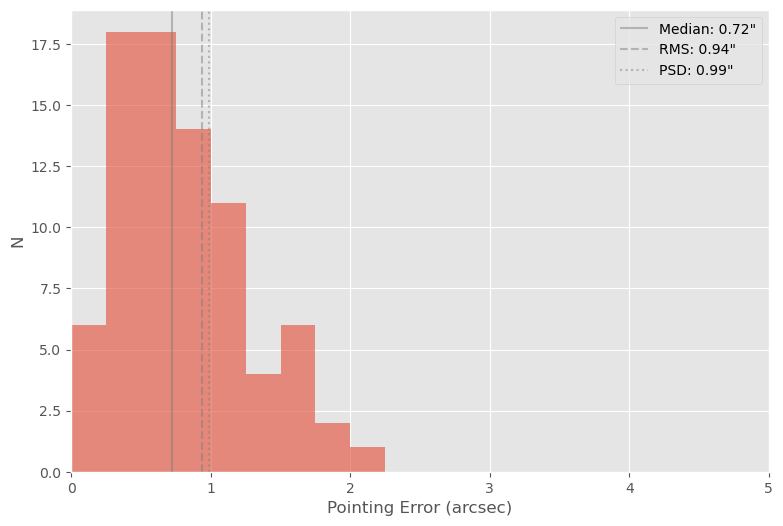

In [9]:
f = pointing_histogram(coo_ref, mc_coo)